# Предсказание инсульта

По данным Всемирной организации здравоохранения (ВОЗ) инсульт является второй ведущей причиной смерти в мире,
на него приходится примерно 11% от общего числа смертей. Этот набор данных используется для прогнозирования вероятности
инсульта у пациента на основе входных параметров, таких как пол, возраст, различные заболевания и статус курения.
Каждая строка данных содержит соответствующую информацию о пациенте.

## Информация о признаках

1. id: уникальный идентификатор;
2. gender: «Male», «Female» или «Other»;
3. age: возраст пациента;
4. hypertension: 0, если у пациента нет гипертонии, 1, если у пациента гипертония;
5. heart_disease: 0, если у пациента нет сердечных заболеваний, 1, если у пациента сердечное заболевание;
6. ever_married: «Yes» или «No»;
7. work_type: «children», «Govt_job», «Never_worked», «Private» или «Self-employed»;
8. residence_type: «Urban» или «Rural»;
9. avg_gluosis_level: средний уровень глюкозы в крови;
10. bmi: индекс массы тела;
11. Smoking_status: «formely smoked», «never smoked», "smokes"или «Unknown»*;
12. инсульт: 1, если у пациента был инсульт, или 0, если нет;
* Примечание. «Unknown» в состоянии Smoking_status означает, что информация об этом пациенте недоступна.

## 0. Описание задачи классификации 

По имеющимся признака необходимо спрогнозировать инсульт у пациента.

## 1. Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble

Прочитаем таблицу.

In [2]:
data = pd.read_csv("./healthcare-dataset-stroke-data.csv")

## 2. Визуализация данных

Узнаем размер таблицы.

In [3]:
data.shape

(5110, 12)

Посмотрим на первые и последние строки таблицы. Каждая строка соответствует пациенту. Каждый столбец соответсует признаку.

In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


1. Признак "id" обозначает номер пациента. Он не может влиять на классификацию, мы от него избавляемся;

In [5]:
data = data.drop(data.iloc[:,[0]], axis = 1)

2. Признаки "Gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status" являются категориальными. Заменимих тип на 'category'

In [6]:
data.iloc[:,[0, 2, 3, 4, 5, 6, 9]] = data.iloc[:,[0, 2, 3, 4, 5, 6, 9]].astype('category')

Выполним визуализацию классифицируемого признака:

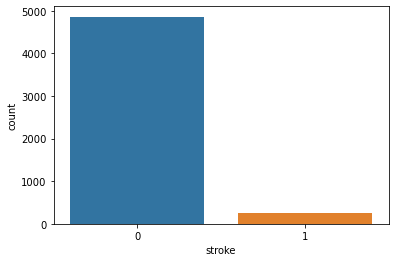

In [7]:
sns.countplot(x="stroke", data = data)
pass

Мы видим, что классы в задаче не сблансированы, так как большинство пациентов больницы могут в ней прибывать не по причине инсульта.

Следующая таблица отписывает среднее значение, стандартное отоклонение, минимальное и максимальное значение для каждого количественного признака.

In [8]:
data_new = data
data_new = data_new.drop(['stroke'], axis = 1)
data_new.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


Вычислим матрицу корреляции для колличественных признаков

In [9]:
data_new.corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


Визуализируем эту матрицу

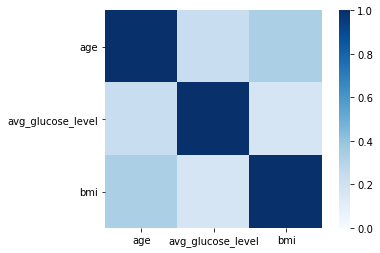

In [10]:
sns.heatmap(data_new.corr(), square = True, vmin = 0, vmax = 1, cmap = "Blues")
pass

Построим графики зависимости количественных признаков

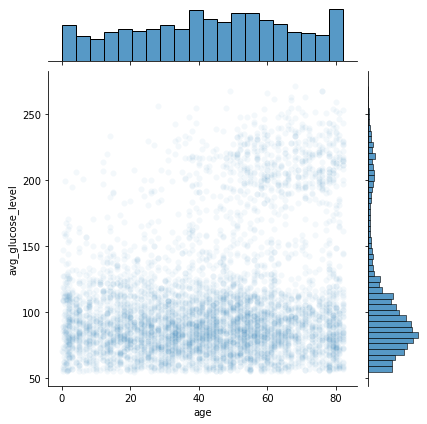

In [11]:
sns.jointplot(x='age', y='avg_glucose_level', alpha=.05, data=data_new)
pass

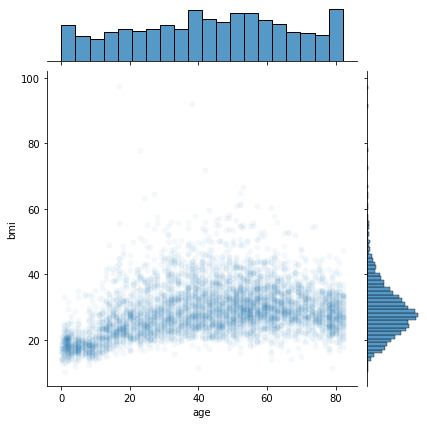

In [12]:
sns.jointplot(x='age', y='bmi', alpha=.05, data=data_new)
pass

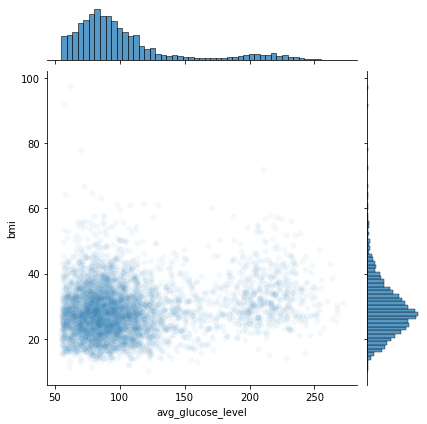

In [13]:
sns.jointplot(x='avg_glucose_level', y='bmi', alpha=.05, data=data_new)
pass

Сильных корреляций (>= 0.5) не наблюдается. Возраст, индекс массы тела и средний уровень глюкозы в крови кореллируют между собой не сильно, так как признаки индекс массы тела и средний уровень глюкозы в крови зависят от образа жизни.

Выполним визуализацию категориальных признаков

In [14]:
data.describe(include = ['category'])

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4
top,Female,0,0,Yes,Private,Urban,never smoked
freq,2994,4612,4834,3353,2925,2596,1892


## Обработка пропущенных значений

Найдем пропущенные значения в каждом столбце

In [15]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Выбросим строки с пропущенными значениями из таблицы

In [16]:
data = data.dropna()

In [17]:
data.shape

(4909, 11)

In [18]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Видно, что пропущенных значений в таблице больше нет

## Обработка категориальных признаков

Выполним обработку категориальных признаков. Признаки 'hypertension', 'heart_disease', 'ever_married' и 'Residence_type' являются бинарными признаками. Обработаем их.

In [19]:
data['ever_married'] = pd.factorize(data['ever_married'])[0]
data['Residence_type'] = pd.factorize(data['Residence_type'])[0]
data['heart_disease'] = pd.factorize(data['heart_disease'])[0]
data['hypertension'] = pd.factorize(data['hypertension'])[0]

Признаки 'work_type', 'smoking status' и 'gender' не являются бинарными. Выполним бинаризацию этих признаков.

In [20]:
Work_dummies = pd.get_dummies(data['work_type'])
Smoking_dummies = pd.get_dummies(data['smoking_status'])
Gender_dummies = pd.get_dummies(data['gender'])
data = pd.concat((data, Work_dummies), axis=1)
data = data.drop(['work_type'], axis=1)
data = pd.concat((data, Smoking_dummies), axis=1)
data = data.drop(['smoking_status'], axis=1)
data = pd.concat((data, Gender_dummies), axis=1)
data = data.drop(['gender'], axis=1)

In [21]:
data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,Female,Male,Other
0,67.0,0,0,0,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0,0,1,0
2,80.0,0,0,0,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0,0,1,0
3,49.0,0,1,0,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1,1,0,0
4,79.0,1,1,0,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0,1,0,0
5,81.0,0,1,0,0,186.21,29.0,1,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,1,1,1,103.08,18.6,0,0,0,0,0,1,1,0,0,0,1,0,0
5106,81.0,0,1,0,0,125.20,40.0,0,0,0,0,1,0,0,0,1,0,1,0,0
5107,35.0,0,1,0,1,82.99,30.6,0,0,0,0,1,0,0,0,1,0,1,0,0
5108,51.0,0,1,0,1,166.29,25.6,0,0,0,1,0,0,0,1,0,0,0,1,0


Выполнена обработка категориальных признаков. 

## Стандартизация признаков

Выполним стандартизацию всех признаков для лучшего обучения (удобнее сравнивать объекты признаков с различными единицами измерения и масштабами)

In [22]:
y = data['stroke']
data = data.drop(['stroke'], axis = 1)

data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,Female,Male,Other
count,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03,4.909000e+03
mean,-9.526879e-16,1.632451e-15,2.235542e-15,1.096292e-15,1.701633e-16,7.344852e-15,-1.405566e-15,-6.027636e-16,1.064765e-16,1.417847e-15,-5.448212e-17,-1.231581e-15,1.086069e-15,-1.356625e-16,-7.395456e-17,-4.062525e-16,6.423417e-16,9.792760e-18,-3.707234e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.896926e+00,-3.180343e-01,-4.381522e+00,-7.294100e-01,-9.855395e-01,-1.129677e+00,-2.367339e+00,-3.836674e-01,-6.708817e-02,-1.157400e+00,-4.329337e-01,-3.978657e-01,-6.578588e-01,-4.533302e-01,-7.782669e-01,-4.202593e-01,-1.199820e+00,-8.329379e-01,-1.427261e-02
25%,-7.920764e-01,-3.180343e-01,2.281847e-01,-7.294100e-01,-9.855395e-01,-6.355784e-01,-6.866808e-01,-3.836674e-01,-6.708817e-02,-1.157400e+00,-4.329337e-01,-3.978657e-01,-6.578588e-01,-4.533302e-01,-7.782669e-01,-4.202593e-01,-1.199820e+00,-8.329379e-01,-1.427261e-02
50%,5.030461e-02,-3.180343e-01,2.281847e-01,-7.294100e-01,-9.855395e-01,-3.067046e-01,-1.009970e-01,-3.836674e-01,-6.708817e-02,8.638296e-01,-4.329337e-01,-3.978657e-01,-6.578588e-01,-4.533302e-01,-7.782669e-01,-4.202593e-01,8.332887e-01,-8.329379e-01,-1.427261e-02
75%,7.596781e-01,-3.180343e-01,2.281847e-01,1.370692e+00,1.014466e+00,1.860433e-01,5.356159e-01,-3.836674e-01,-6.708817e-02,8.638296e-01,-4.329337e-01,-3.978657e-01,1.519773e+00,-4.533302e-01,1.284645e+00,-4.202593e-01,8.332887e-01,1.200325e+00,-1.427261e-02
max,1.735067e+00,3.143674e+00,2.281847e-01,1.370692e+00,1.014466e+00,3.746479e+00,8.747922e+00,2.605893e+00,1.490272e+01,8.638296e-01,2.309352e+00,2.512899e+00,1.519773e+00,2.205448e+00,1.284645e+00,2.378998e+00,8.332887e-01,1.200325e+00,7.004998e+01


## Разделение на обучающую и тестовую выборку

In [23]:
x = data_stand
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 73)

print(x_train.shape , x_test.shape)

(3927, 19) (982, 19)


## Метод k-ближайших соседей

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(x_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.04532698011377456 8


In [25]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(x_train, y_train)
err_train = np.mean(y_train != knn.predict(x_train))
err_test  = np.mean(y_test != knn.predict(x_test))
print(confusion_matrix(y_test, knn.predict(x_test)))
print(err_train, err_test)

[[952   0]
 [ 30   0]]
0.04405398523045582 0.03054989816700611


## Метод random forest

In [26]:
rf = ensemble.RandomForestClassifier(n_estimators = 50)
rf.fit(x_train, y_train)
err_train = np.mean(y_train != rf.predict(x_train))
err_test  = np.mean(y_test  != rf.predict(x_test))
print(confusion_matrix(y_test, rf.predict(x_test)))
print(err_train, err_test)

[[949   3]
 [ 30   0]]
0.00025464731347084286 0.03360488798370672


## Метод опорных векторов

In [27]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

err_train = np.mean(y_train != svc.predict(x_train))
err_test  = np.mean(y_test  != svc.predict(x_test))
print(confusion_matrix(y_test, svc.predict(x_test)))
print(err_train, err_test)

[[952   0]
 [ 30   0]]
0.04507257448433919 0.03054989816700611


## Классификация с помощью нейронной сети

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Подбор оптимального параметра alpha (1 слой и 100 нейронов)

In [29]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=10000, random_state = 73)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

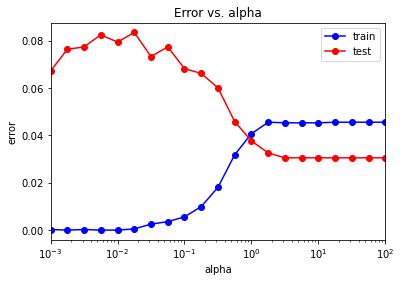

In [30]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

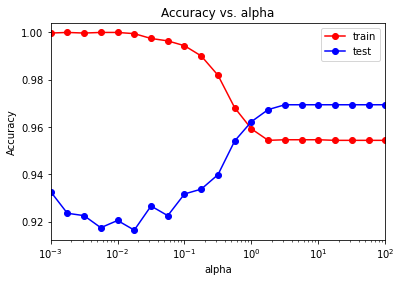

In [31]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.03054989816700611


In [33]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print("Оптимальное значение параметра: ", alpha_opt)

Оптимальное значение параметра:  3.1622776601683795


In [34]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 73)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке: ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.045327221797810034
Ошибка на тестовой выборке:  0.03054989816700611


### Подбор оптимального числа нейронов на первом слове при ранее найденном alpha

In [35]:
alpha_arr = np.linspace(1, 101, 50).astype(int)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (alpha,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 73)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

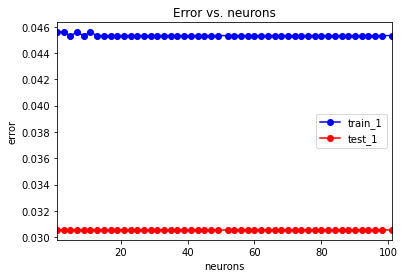

In [36]:
plt.plot(alpha_arr, train_err, 'b-o', label = 'train_1')
plt.plot(alpha_arr, test_err, 'r-o', label = 'test_1')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. neurons')
plt.xlabel('neurons')
plt.ylabel('error')
plt.legend()

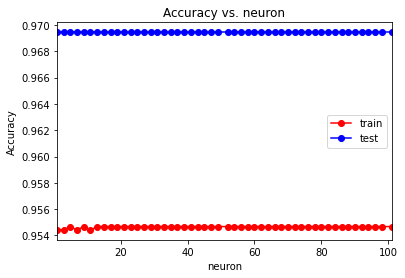

In [37]:
plt.plot(alpha_arr, train_acc, 'r-o', label = 'train')
plt.plot(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. neuron')
plt.xlabel('neuron')
plt.ylabel('Accuracy')
plt.legend()

In [38]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.045327221797810034 0.03054989816700611


In [39]:
n_opt = alpha_arr[test_err == min_test_err]
print(alpha_arr)
n_opt = n_opt[0]
print("Оптимальное значение количества нейронов на первом слое: ", n_opt)

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 101]
Оптимальное значение количества нейронов на первом слое:  1


In [40]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (n_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 73)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке: ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.04558186911128088
Ошибка на тестовой выборке:  0.03054989816700611


### Подбор оптимального числа нейронов на втором слое при ранее найденном alpha и числе нейронов на первом слое

In [41]:
alpha_arr = np.linspace(1, 101, 50).astype(int)
test_err = []
train_err = []
train_acc = []
test_acc = []

test_err_1 = []
train_err_1 = []
train_acc_1 = []
test_acc_1 = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (n_opt,alpha), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 73)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

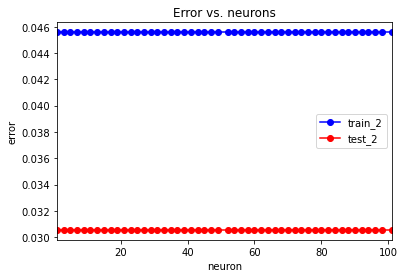

In [42]:
plt.plot(alpha_arr, train_err, 'b-o', label = 'train_2')
plt.plot(alpha_arr, test_err, 'r-o', label = 'test_2')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. neurons')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()

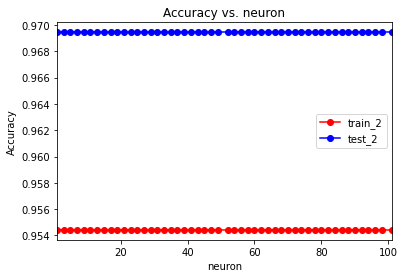

In [43]:
plt.plot(alpha_arr, train_acc, 'r-o', label = 'train_2')
plt.plot(alpha_arr, test_acc, 'b-o', label = 'test_2')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. neuron')
plt.xlabel('neuron')
plt.ylabel('Accuracy')
plt.legend()

In [44]:
n_opt_2 = alpha_arr[test_err == min_test_err]
print(alpha_arr)
n_opt_2 = n_opt_2[0]
print("Оптимальное значение количества нейронов на втором слое: ", n_opt_2)

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 101]
Оптимальное значение количества нейронов на втором слое:  1


In [45]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (n_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 73)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print("Ошибка на обучающей выборке: ", np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке: ", np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке:  0.04558186911128088
Ошибка на тестовой выборке:  0.03054989816700611


## Балансировка классов

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE (#sampling_strategy = 0.9,
	    random_state=73,
	    k_neighbors=8)
x_train_res, y_train_res = sm.fit_resample (x_train, y_train)

([<matplotlib.patches.Wedge at 0x1d194429b50>,
 [Text(6.735557395310444e-17, 1.1, 'Stroke'),
  Text(-2.0206672185931328e-16, -1.1, 'No stroke')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

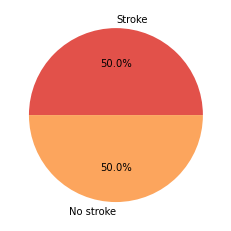

In [47]:
plt.pie(y_train_res.value_counts(), labels = ["Stroke", "No stroke"], colors = sns.color_palette("Spectral"), autopct = '%1.1f%%')

In [48]:
x_train = x_train_res
y_train = y_train_res
print(x_train.shape, x_test.shape)

(7496, 19) (982, 19)


## Метод k-ближайших соседей

In [52]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(x_train, y_train)
err_train = np.mean(y_train != knn.predict(x_train))
err_test  = np.mean(y_test != knn.predict(x_test))
print(confusion_matrix(y_test, knn.predict(x_test)))
print(err_train, err_test)

[[790 162]
 [ 20  10]]
0.06790288153681964 0.18533604887983707


## Метод random forest

In [53]:
rf = ensemble.RandomForestClassifier(n_estimators = 50)
rf.fit(x_train, y_train)
err_train = np.mean(y_train != rf.predict(x_train))
err_test  = np.mean(y_test  != rf.predict(x_test))
print(confusion_matrix(y_test, rf.predict(x_test)))
print(err_train, err_test)

[[892  60]
 [ 26   4]]
0.00013340448239060833 0.08757637474541752


## Метод опорных векторов

In [54]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

err_train = np.mean(y_train != svc.predict(x_train))
err_test  = np.mean(y_test  != svc.predict(x_test))
print(confusion_matrix(y_test, svc.predict(x_test)))
print(err_train, err_test)

[[766 186]
 [ 17  13]]
0.09711846318036287 0.20672097759674135


## Выводы

По рассматриваемому датасету можно сделать следующие выводы:
1. Классы являются несбалансированными. Число пацинетов в больнице с инсультом может быть не очень велико. Люди могут обращаться в больницу по другой причине.
2. Большинство пациентов не имеют сердечно-сосудистых заболеваний.
3. Большинство пациентов не имеют гипертонии.
4. Большинстов пациентов женаты (замужем)
5. Многие пациенты курили или курят.


По решению задачи классификации можно сделать следующие выводы:
1. 8 - оптимальное количество соседей для метода k-ближайших соседей (ошибка кросс-валидации составила 4.5%). Метод KNN для 8 соседей выполнил обучение с ошибкой 4.4% и тестирование с ошибкой 3.05%.
2. Метод random forest выполнил обучение с ошибкой 0.025% и тестирование с ошибкой 3.3%
3. Метод опорных векторов выполнил обучение с ошибкой 4.5% и тестирование с ошибкой 3.06%

По решению задачи классификации с помощью нейронных сетей можно сделать следующие выводы:
1. Наименьшая ошибка на тестовой выборке достигла 3.05% при следующих значениях параметров: alpha = 3.16, число нейронов на первом слое = 1, число нейронов на втором слое = 1.
2. Наименьшая ошибка на тестовой выборке совпадает с наименьшей ошибкой на тестовой выборке, полученной методом k-ближайших соседей.
3. Недообучение и переобучение не наблюдается

По решению задачи классификации после выполнения балансировки классов можно сделать следующие выводы:
1. Для балансировки использовался метод SMOTE. После балансировки имеем сбалансированные классы.
2. Метод KNN для 8 соседей выполнил обучение с ошибкой 6.7% и тестирование с ошибкой 18.5%.
3. Метод random forest выполнил обучение без ошибок и тестирование с ошибкой 8.6%
4. Метод опорных векторов выполнил обучение с ошибкой 9.7% и тестирование с ошибкой 20.7%
5. Результаты после балансировки для данных методов имеют большую ошибку.